In [ ]:
## 패키지 설치
pip install nltk konlpy pandas networkx gensim

In [ ]:
## 코랩 한글 깨짐 현상 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
from pandas import DataFrame

In [3]:
## 1. 
## [함수 정의] #################################################################
## 탐색하고자 하는 대상이 단어인가 문서인가에 따라 TF와 DF로 나뉨 ##############
## tf (term frequency) : 1개 문서 내 특정 단어 빈도
def tf(term, document):
    return document.count(term)


docs = []

## df (document frequency) : 특정 단어가 나타나는 문서의 개수
def df(term):
    df = 0
    for doc in docs:
        df += term in doc
    return df

## IDF (Inverse Document Frequency) : DF에서 역수 변환
## d : 문서, t : 단어, n : 문서 총 개수
def idf(term):
    return log(N/(df(term)+1))

## tf_idf : 많이 등장하는 단어에 패널티를 주고 단어 빈도의 스케일을 맞춰주는 방법
## 수식으로는 TF-IDF = tf*idf
def tf_idf(term, document):
    return tf(term, document) * idf(term)

In [ ]:
####################################################################################################
## Code start ######################################################################################
####################################################################################################
from nltk.tokenize import sent_tokenize
from konlpy.corpus import kolaw
from konlpy.tag import *
from pandas import DataFrame
from math import log

import konlpy
import nltk
import pandas as pd

## 파일 읽어오기 #######################################################
## 1) 코랩에 파일 업로드
# from google.colab import files
# myfile = files.upload()

## 2) 2기 csv 파일 읽어오기
current_work = 'time_2.csv'

table_2 = pd.read_csv(current_work)
# table_2
#type(table_2)        ## DataFrame

In [5]:
row, col = table_2.shape

news_content = table_2['기사제목']  ## Object
#news_content

news_content_list = list(news_content)
# news_content_list

## 자료형 변환 : list -> str
# news_content_str = ' '.join(news_content_list)
news_content_str = ' '.join(map(str, news_content_list))

In [6]:
'''
nouns : 명사 추출
morphs : 형태소 추출
pos : 품사 부착
'''
komoran = Komoran()

## 메모리 설정
# konlpy.jvm.init_jvm(jvmpath=None, max_heap_size=1024)

## 형태소와 품사 추출 ######################################################################
# pos = komoran.pos(news_content_str)
# pos

'''
NNB: '의존 명사',
NNG: '일반 명사',
NNP: '고유 명사',
NP : '대명사',
'''

## 7분 29초 소요 ############################################################################

"\nNNB: '의존 명사',\nNNG: '일반 명사',\nNNP: '고유 명사',\nNP : '대명사',\n"

In [ ]:
kopus = []
token_result = []

#############################################################################################################
## 불용어 처리 : 단어 제외하기 ########################################################################

stop_word = ['로나', '19', '째 코', '10', '20', '11', '100', '진자']

for line in news_content_list:
    pos = komoran.pos(line)
    NN = [element[0] for element in pos if element[1] in ('NNP', 'NNG')]
    # print('NN >>', NN)

    NN_copy = NN[:]

    for N in NN:
      # print('N >>', N)

      if N in stop_word:
        NN_copy.remove(N)

      if len(N) == 1:
        NN_copy.remove(N)

    # print('NN : 불용어 삭제 후 >>', NN)

    token_result.append(NN_copy)
    kopus.extend(NN_copy)
        
# print('=' * 100)    
# kopus


In [8]:
#######################################################################################################
# docs = list(test_file['기사내용'])
docs = news_content_list

# ## 총 문서 수
# N = len(docs)
N = row

## 중복 제거한 형태소 #################################################################################
voca = list(set(kopus))
# print('중복 제거한 형태소 개수 >>', len(voca))
# voca

# print(docs)
print('docs 수 >>', len(docs))
print('N 수 >>', N)
print('형태소 개수 : voca 수 >>', len(voca))

## IDF -------------------------------------------------------------------------------
# IDE_result = []

# for t in final_voca:
#     IDE_result.append(idf(t))

# IDE_result

# idf_ = pd.DataFrame(IDE_result, index=final_voca, columns=["IDF"])
# idf_
# idf_.IDF.sort_values(ascending=False)[:30]

## tf_idf -----------------------------------------------------------------------------
TF_IDE_result = []

for word in voca:
#     print(word)
    TF_IDE_result.append(tf_idf(word, news_content_str))
    
# TF_IDE_result

tf_idf_ = pd.DataFrame(TF_IDE_result, index=voca, columns=["IDF"])
# tf_idf_

tf_idf_final = tf_idf_.sort_values(by='IDF', ascending=False)[:30]  ## 최종 30개 형태소 추출
tf_idf_final.to_csv(f'{current_work}_tf_idf.csv')
print(f'{current_work}_tf_idf.csv 파일 저장 완료!!')

docs 수 >> 36000
N 수 >> 36000
형태소 개수 : voca 수 >> 11255
time_2.csv_tf_idf.csv 파일 저장 완료!!


In [9]:
tf_idf_final.index

Index(['확진', '신규', '확산', '발생', '백신', '감염', '방역', '극복', '치료', '지원', '검사', '지역',
       '치료제', '종합', '추가', '대응', '국내', '추석', '위기', '속보', '임상', '환자', '사망', '병원',
       '진단', '서울', '자릿수', '세계', '해외', '긴급'],
      dtype='object')

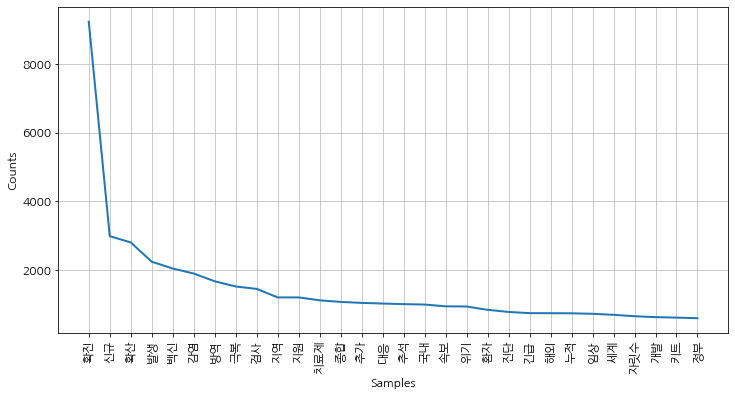

워드 클라우드 저장 완료 !!


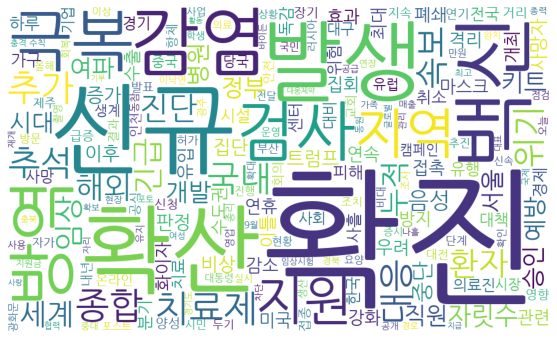

In [10]:
############################################################################################
## koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.
############################################################################################
from nltk import Text
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', family='NanumGothic') ## 글꼴
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.xlabel('키워드')

kopus_corona_except = [k for k in kopus if k != '코로나']

text = Text(kopus_corona_except, name="단어")

#text.vocab()
chart = text.plot(30)

# chart.savefig(f'{current_work}_chart.png')
# print('이미지 저장 완료!!')

##############################################################################################
## wordcloud #################################################################################
##############################################################################################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

plt.rc('font', family='NanumGothic') ## 글꼴
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(text.vocab()))
plt.axis("off")

plt.savefig(f'{current_work}_wordcloud.png')
print('워드 클라우드 저장 완료 !!')

In [11]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

## Word2Vec 훈련시키기 #####################################################################################
#type(kopus_result) ##list
# word2vec_model = Word2Vec(sentences=kopus_result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
model = Word2Vec(sentences=token_result, size=100, window=5, min_count=2, workers=4, sg=1)


In [12]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(7600, 100)

In [13]:
model.wv.vectors

array([[-0.05084065,  0.28669187, -0.1598225 , ..., -0.17336659,
         0.22608967, -0.07573172],
       [ 0.19153228, -0.20750421, -0.0878507 , ..., -0.49577072,
         0.32984418, -0.07673484],
       [ 0.25770587, -0.25780094,  0.10785555, ..., -0.20232193,
         0.01137043, -0.6536388 ],
       ...,
       [ 0.03038688,  0.03858637, -0.00558257, ..., -0.12778036,
         0.11879379, -0.03278886],
       [ 0.00210792,  0.05351533,  0.00293905, ..., -0.11522081,
         0.10960509, -0.01972299],
       [ 0.01009158,  0.05845226,  0.00509863, ..., -0.15624206,
         0.13947624, -0.01400138]], dtype=float32)

In [ ]:
## Word2Vec ################################################################
## model.wv.most_similar: 입력한 단어에 대해서 가장 유사한 단어들 출력
############################################################################
model_result = model.wv.most_similar("코로나")
print(model_result)

[('상보', 0.6535905003547668), ('가나', 0.6463114619255066), ('8월 31일', 0.6333550810813904), ('총력전', 0.632732629776001), ('대부분', 0.6320425868034363), ('스페인', 0.6319763660430908), ('11월 10일', 0.6302071809768677), ('얼마', 0.6296501755714417), ('중반', 0.6290383338928223), ('종합', 0.627776026725769)]


In [15]:
model.wv.most_similar("코로나")

[('상보', 0.6535905003547668),
 ('가나', 0.6463114619255066),
 ('8월 31일', 0.6333550810813904),
 ('총력전', 0.632732629776001),
 ('대부분', 0.6320425868034363),
 ('스페인', 0.6319763660430908),
 ('11월 10일', 0.6302071809768677),
 ('얼마', 0.6296501755714417),
 ('중반', 0.6290383338928223),
 ('종합', 0.627776026725769)]

In [16]:
## 코로나와 관련된 TOP 30 추출
model.wv.most_similar('코로나', topn=30)

[('상보', 0.6535905003547668),
 ('가나', 0.6463114619255066),
 ('8월 31일', 0.6333550810813904),
 ('총력전', 0.632732629776001),
 ('대부분', 0.6320425868034363),
 ('스페인', 0.6319763660430908),
 ('11월 10일', 0.6302071809768677),
 ('얼마', 0.6296501755714417),
 ('중반', 0.6290383338928223),
 ('종합', 0.627776026725769),
 ('초반', 0.6267812252044678),
 ('10월 30일', 0.6265921592712402),
 ('이탈리아', 0.6257248520851135),
 ('진입', 0.6213277578353882),
 ('관건', 0.6209778785705566),
 ('지난주', 0.6200222969055176),
 ('내주', 0.6191942095756531),
 ('미만', 0.6188315153121948),
 ('9월 10일', 0.6179097890853882),
 ('캐나다', 0.617752194404602),
 ('자중', 0.617480456829071),
 ('핫스팟', 0.6171137094497681),
 ('설명', 0.6162409782409668),
 ('숫자', 0.6154395937919617),
 ('대본', 0.6151027679443359),
 ('10월 9일', 0.6148094534873962),
 ('일요일', 0.613906741142273),
 ('증대', 0.61308354139328),
 ('베트남전', 0.612186074256897),
 ('10월 31일', 0.6120280027389526)]

In [20]:
keyword = '자릿수'

table_2.기사제목[table_2.기사제목.str.contains(keyword)]

68                           코로나19 신규 확진자 288명…일주일째 세자릿수
133                          코로나19 신규 확진자 288명…일주일째 세자릿수
2600                 코로나 여파에 대전지역 신용카드 매출액, 7월에도 두자릿수 하락
2756                  [코로나19] 中, 신규 확진 한 자릿수…나흘째 본토 ‘0’명
3209                    中코로나19, 35일만에 한자릿수…본토확진 나흘째 '0'명
                              ...                       
35713                         코로나19 신규 확진 145명…사흘째 세 자릿수
35835             코로나19 어제 143명 신규확진, 다시 세자릿수…“집단발병 잇따라”
35888    국내 코로나19 신규 확진자 사흘 만에 세 자릿수…경기 41명·서울 39명·충남...
35941                   [속보] 코로나 신규 확진 89명... 나흘만에 두 자릿수
35958                  코로나 신규확진 89명, 나흘만에 두 자릿수…지역발생 72명
Name: 기사제목, Length: 810, dtype: object

In [19]:
keyword = '긴급'

keyword_search = table_2.기사제목[table_2.기사제목.str.contains(keyword)]
print('개수 >>', len(keyword_search))
keyword_search


개수 >> 747


82                   코로나19 확산세, 긴급호소 기자회견하는 이재명 지사
120                  코로나19에 가계 살림 직격탄…긴급재난지원금으로 지탱
143            코로나 장기화로 팍팍해진 가계 살림…“긴급 재난지원금으로 버텨”
164                  코로나19 확산세, 긴급호소 기자회견하는 이재명 지사
195                이재명 지사, 코로나19 대유행에 따른 긴급호소 기자회견
                           ...                    
34945                  휴메딕스, 코로나 항원키트 러시아 긴급 사용 승인
34967                      충주시, 코로나19 관련 긴급대책회의 개최
35490    화이자, 코로나 백신 예방효과 90% 넘었다...美서 긴급 사용 승인 신청
35532      코로나19, 특고·프리랜서에 미친 영향은?…긴급지원금 신청 분석해 보니
35545              양평군, 코로나19 위기가구 긴급생계지원 신청 6일 마감
Name: 기사제목, Length: 747, dtype: object

In [ ]:
## 1. n-gram #######################################
token = list(tf_idf_final.index)
token_len = len(token)
n_gram = []

for idx, out_token in enumerate(token, 1):
    #print('out_token>>', out_token)
    
    if idx == token_len:
        break
        
    for in_token in token[idx:]:
        #print('\tin_token>>', in_token)
        n_gram.append((out_token, in_token))
        
n_gram        

# n_gram[:10]

[('확진', '신규'),
 ('확진', '확산'),
 ('확진', '발생'),
 ('확진', '백신'),
 ('확진', '감염'),
 ('확진', '방역'),
 ('확진', '극복'),
 ('확진', '치료'),
 ('확진', '지원'),
 ('확진', '검사'),
 ('확진', '지역'),
 ('확진', '치료제'),
 ('확진', '종합'),
 ('확진', '추가'),
 ('확진', '대응'),
 ('확진', '국내'),
 ('확진', '추석'),
 ('확진', '위기'),
 ('확진', '속보'),
 ('확진', '임상'),
 ('확진', '환자'),
 ('확진', '사망'),
 ('확진', '병원'),
 ('확진', '진단'),
 ('확진', '서울'),
 ('확진', '자릿수'),
 ('확진', '세계'),
 ('확진', '해외'),
 ('확진', '긴급'),
 ('신규', '확산'),
 ('신규', '발생'),
 ('신규', '백신'),
 ('신규', '감염'),
 ('신규', '방역'),
 ('신규', '극복'),
 ('신규', '치료'),
 ('신규', '지원'),
 ('신규', '검사'),
 ('신규', '지역'),
 ('신규', '치료제'),
 ('신규', '종합'),
 ('신규', '추가'),
 ('신규', '대응'),
 ('신규', '국내'),
 ('신규', '추석'),
 ('신규', '위기'),
 ('신규', '속보'),
 ('신규', '임상'),
 ('신규', '환자'),
 ('신규', '사망'),
 ('신규', '병원'),
 ('신규', '진단'),
 ('신규', '서울'),
 ('신규', '자릿수'),
 ('신규', '세계'),
 ('신규', '해외'),
 ('신규', '긴급'),
 ('확산', '발생'),
 ('확산', '백신'),
 ('확산', '감염'),
 ('확산', '방역'),
 ('확산', '극복'),
 ('확산', '치료'),
 ('확산', '지원'),
 ('확산', '검사'),
 ('확산', '지역'),
 ('확산'

In [ ]:
## 2. 어휘 동시 출현 빈도의 계수화 #######################################
co_occurrence = {}

for token_element in token_result:
    for n in n_gram:
        compare = set(token_element) & set(n)
        if len(compare) == 2:
            co_occurrence[n] = co_occurrence.get(n, 0) + 1
            
co_occurrence

{('감염', '검사'): 19,
 ('감염', '국내'): 85,
 ('감염', '극복'): 2,
 ('감염', '긴급'): 4,
 ('감염', '대응'): 15,
 ('감염', '방역'): 40,
 ('감염', '병원'): 101,
 ('감염', '사망'): 17,
 ('감염', '서울'): 49,
 ('감염', '세계'): 17,
 ('감염', '속보'): 55,
 ('감염', '위기'): 5,
 ('감염', '자릿수'): 39,
 ('감염', '종합'): 94,
 ('감염', '지역'): 191,
 ('감염', '지원'): 5,
 ('감염', '진단'): 9,
 ('감염', '추가'): 116,
 ('감염', '추석'): 47,
 ('감염', '치료'): 5,
 ('감염', '치료제'): 4,
 ('감염', '해외'): 54,
 ('감염', '환자'): 79,
 ('검사', '국내'): 9,
 ('검사', '긴급'): 8,
 ('검사', '대응'): 22,
 ('검사', '병원'): 92,
 ('검사', '사망'): 2,
 ('검사', '서울'): 27,
 ('검사', '세계'): 7,
 ('검사', '속보'): 33,
 ('검사', '위기'): 2,
 ('검사', '자릿수'): 2,
 ('검사', '종합'): 68,
 ('검사', '지역'): 5,
 ('검사', '진단'): 100,
 ('검사', '추가'): 17,
 ('검사', '추석'): 9,
 ('검사', '치료제'): 1,
 ('검사', '해외'): 2,
 ('검사', '환자'): 25,
 ('국내', '긴급'): 1,
 ('국내', '병원'): 1,
 ('국내', '사망'): 14,
 ('국내', '서울'): 19,
 ('국내', '세계'): 6,
 ('국내', '속보'): 92,
 ('국내', '위기'): 6,
 ('국내', '임상'): 56,
 ('국내', '자릿수'): 49,
 ('국내', '진단'): 26,
 ('국내', '추석'): 11,
 ('국내', '해외'): 125,
 ('국

In [ ]:
## 2. 어휘 동시 출현 빈도의 계수화 #######################################
co_occurrence = {}

for token_element in token_result:
    for n in n_gram:
        compare = set(token_element) & set(n)
        if len(compare) == 2:
            co_occurrence[n] = co_occurrence.get(n, 0) + 1
            
co_occurrence

{('감염', '검사'): 19,
 ('감염', '국내'): 85,
 ('감염', '극복'): 2,
 ('감염', '긴급'): 4,
 ('감염', '대응'): 15,
 ('감염', '방역'): 40,
 ('감염', '병원'): 101,
 ('감염', '사망'): 17,
 ('감염', '서울'): 49,
 ('감염', '세계'): 17,
 ('감염', '속보'): 55,
 ('감염', '위기'): 5,
 ('감염', '자릿수'): 39,
 ('감염', '종합'): 94,
 ('감염', '지역'): 191,
 ('감염', '지원'): 5,
 ('감염', '진단'): 9,
 ('감염', '추가'): 116,
 ('감염', '추석'): 47,
 ('감염', '치료'): 5,
 ('감염', '치료제'): 4,
 ('감염', '해외'): 54,
 ('감염', '환자'): 79,
 ('검사', '국내'): 9,
 ('검사', '긴급'): 8,
 ('검사', '대응'): 22,
 ('검사', '병원'): 92,
 ('검사', '사망'): 2,
 ('검사', '서울'): 27,
 ('검사', '세계'): 7,
 ('검사', '속보'): 33,
 ('검사', '위기'): 2,
 ('검사', '자릿수'): 2,
 ('검사', '종합'): 68,
 ('검사', '지역'): 5,
 ('검사', '진단'): 100,
 ('검사', '추가'): 17,
 ('검사', '추석'): 9,
 ('검사', '치료제'): 1,
 ('검사', '해외'): 2,
 ('검사', '환자'): 25,
 ('국내', '긴급'): 1,
 ('국내', '병원'): 1,
 ('국내', '사망'): 14,
 ('국내', '서울'): 19,
 ('국내', '세계'): 6,
 ('국내', '속보'): 92,
 ('국내', '위기'): 6,
 ('국내', '임상'): 56,
 ('국내', '자릿수'): 49,
 ('국내', '진단'): 26,
 ('국내', '추석'): 11,
 ('국내', '해외'): 125,
 ('국

In [ ]:
## 3-1. 어휘 동시 출현 빈도를 데이터프레임으로 변환 #############################
df_co_occurrence = pd.DataFrame.from_dict(co_occurrence, orient='index', columns=['빈도'])
df_co_occurrence[:30].sort_index()
df_co_occurrence[:30].sort_values(by='빈도', ascending=False)

,빈도
"(확진, 신규)",2815
"(확진, 발생)",1880
"(확진, 추가)",783
"(신규, 발생)",757
"(확진, 지역)",721
"(확진, 감염)",705
"(확진, 속보)",623
"(확진, 자릿수)",620
"(신규, 자릿수)",574
"(발생, 지역)",556


In [ ]:
## 3-2. 어휘 동시 출현 빈도를 데이터프레임으로 변환 : 멀티 인덱스로 변환 #############################
copy_df_co_occurrence = df_co_occurrence.copy()
copy_df_co_occurrence.index = pd.MultiIndex.from_tuples(copy_df_co_occurrence.index)
copy_df_co_occurrence

빈도
속보  환자    37
    사망    63
환자  사망    23
백신  치료제  200
치료제 임상   418
...      ...
확진  치료제    1
신규  치료제    1
    임상     1
백신  극복     1
세계  해외     1

[389 rows x 1 columns]

In [ ]:
df_co_occurrence['빈도'][0]

37

In [ ]:
list_df_co_occurrence = []

for idx in range(len(df_co_occurrence)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list_df_co_occurrence.append([df_co_occurrence.index[idx][0],
                                  df_co_occurrence.index[idx][1],
                                  df_co_occurrence['빈도'][idx]])

list_df_co_occurrence

df2_co_occurrence = pd.DataFrame(list_df_co_occurrence, columns=['term1', 'term2', 'freq'])
df2_co_occurrence
df2_co_occurrence.sort_values(by=['freq'], ascending=False)
final_co_occurrence = df2_co_occurrence.sort_values(by=['freq'], ascending=False)
final_co_occurrence

,term1,term2,freq
7,확진,신규,2815
8,확진,발생,1880
17,확진,추가,783
10,신규,발생,757
9,확진,지역,721
...,...,...,...
320,확진,극복,1
318,위기,해외,1
315,치료,자릿수,1
233,치료,위기,1


In [ ]:
## 차트

import numpy as np
import networkx as nx
import operator

## 단어 네트워크 Graph
G=nx.Graph()


## 페이지 랭크에 따라 두 노드 사이 연관성 결정(단어쌍의 연관성)
## 연결 중심성으로 계산한 척도에 따라 노드의 크기 결정(단어 등장 빈도수)
for i in range(len(final_co_occurrence)):
    G.add_edge(final_co_occurrence['term1'][i], 
               final_co_occurrence['term2'][i], 
               weight=int(final_co_occurrence['freq'][i]))

# Compute centralities for nodes.
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
dgr = nx.degree_centrality(G)          ## 연결 중심성
btw = nx.betweenness_centrality(G)     ## 매개 중심성
cls = nx.closeness_centrality(G)       ## 근접 중심성

# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])

print("** closeness **")
for x in range(20):
    print(sorted_cls[x])


for idx in range(len(sorted_cls)):
    G.add_node(sorted_cls[idx][0], nodesize=sorted_cls[idx][1])
#     G.add_node(sorted_btw[idx][0], nodesize=sorted_btw[idx][1])
#     G.add_node(sorted_dgr[idx][0], nodesize=sorted_dgr[idx][1])
    
for idx in range(len(sorted_cls)):
    G.add_weighted_edges_from([(final_co_occurrence['term1'][idx],
                               final_co_occurrence['term2'][idx],
                               #int(final_co_occurrence['freq'][idx]))
                               int(sorted_cls[idx][1]))
                              ])




** degree **
('신규', 1.0)
('추가', 1.0)
('방역', 1.0)
('국내', 1.0)
('환자', 0.9655172413793103)
('확진', 0.9655172413793103)
('확산', 0.9655172413793103)
('감염', 0.9655172413793103)
('종합', 0.9655172413793103)
('해외', 0.9655172413793103)
('병원', 0.9655172413793103)
('속보', 0.9310344827586207)
('긴급', 0.9310344827586207)
('검사', 0.9310344827586207)
('치료', 0.9310344827586207)
('백신', 0.896551724137931)
('발생', 0.896551724137931)
('대응', 0.896551724137931)
('서울', 0.896551724137931)
('위기', 0.8620689655172413)
** betweenness **
('신규', 0.005760110677238304)
('추가', 0.005760110677238304)
('방역', 0.005760110677238304)
('국내', 0.005760110677238304)
('종합', 0.005566259190283368)
('해외', 0.005561797135596426)
('속보', 0.0052103765255551255)
('병원', 0.005154335451787621)
('치료', 0.005018232764899568)
('환자', 0.004850363288209546)
('확산', 0.004829349135421994)
('확진', 0.004497049493902294)
('감염', 0.004497049493902294)
('발생', 0.004054649518625568)
('긴급', 0.00372241513375115)
('검사', 0.0035873021048735375)
('지원', 0.0034768261786165926

In [ ]:
sorted_cls[0][1]
final_co_occurrence['term1'][0]
final_co_occurrence['term2'][0]

'환자'

In [ ]:
sorted_cls

[('신규', 1.0),
 ('추가', 1.0),
 ('방역', 1.0),
 ('국내', 1.0),
 ('환자', 0.9666666666666667),
 ('확진', 0.9666666666666667),
 ('확산', 0.9666666666666667),
 ('감염', 0.9666666666666667),
 ('종합', 0.9666666666666667),
 ('해외', 0.9666666666666667),
 ('병원', 0.9666666666666667),
 ('속보', 0.9354838709677419),
 ('긴급', 0.9354838709677419),
 ('검사', 0.9354838709677419),
 ('치료', 0.9354838709677419),
 ('백신', 0.90625),
 ('발생', 0.90625),
 ('대응', 0.90625),
 ('서울', 0.90625),
 ('위기', 0.8787878787878788),
 ('지원', 0.8787878787878788),
 ('진단', 0.8787878787878788),
 ('지역', 0.8529411764705882),
 ('세계', 0.8529411764705882),
 ('추석', 0.8529411764705882),
 ('사망', 0.8285714285714286),
 ('치료제', 0.8055555555555556),
 ('극복', 0.8055555555555556),
 ('임상', 0.7631578947368421),
 ('자릿수', 0.7631578947368421)]

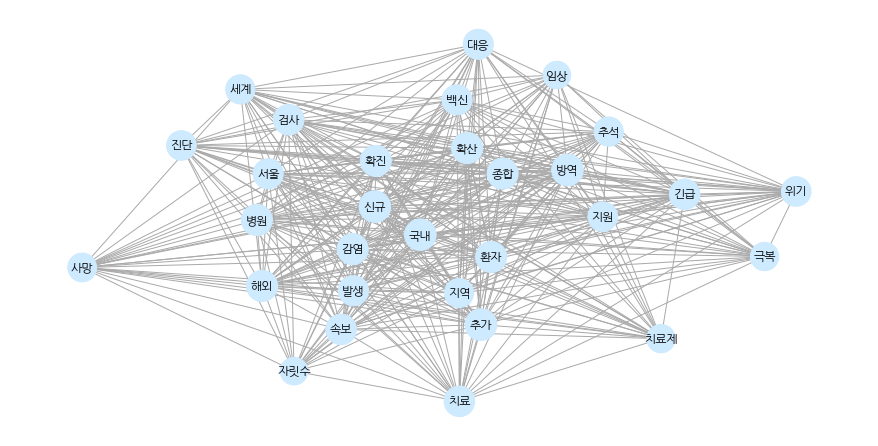

<< 이미지 저장 완료 >>


<Figure size 864x432 with 0 Axes>

In [ ]:
## 노드 크기 결정
size = [G.nodes[node]['nodesize'] * 1000 for node in G]

options = {
    'node_color': '#CDEAFF',
    'edge_color': '#aaa',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

## 폰트 설정을 위한 font_manager import
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

## 폰트 설정
# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', family='NanumGothic') ## 글꼴

## 
nx.draw(G, 
        node_size=size,
        #pos=nx.spring_layout(G, k=5.2, iterations=100),
        pos=nx.spring_layout(G, k=10, iterations=100),
        #pos=nx.spring_layout(G),
        #pos=nx.shell_layout(G),
        **options,
        # font_family='Malgun Gothic',
        font_family='NanumGothic',
        #alpha=0.8,
        #cmap=plt.cm.cmap_d,
       )

ax = plt.gca()
# ax.collections[0].set_edgecolor('#eee')
plt.show()
plt.savefig('network.svg')
print('<<table_2 이미지 저장 완료 >>')